### Coarse bathymetry SVB - Domain 03 

Even longer domain to the north and extended to the west to see if there are any propagaing signals north of the bay. 

Data from GEBCO Compilation Group (2020) GEBCO 2020 Grid (doi:10.5285/a29c5465-b138-234d-e053-6c86abc040b9).

Domain 3 is bounded by

* north: 34.1 N 
* south: 27.0 N
* east: -119.0 W
* west -114.0 W

Other considerations
* Bottom depth flattened to -1000 m. 
* Land set to 0 m. - fixed small puddles on land.
* Erased some weird artifacts from the measurement tracks.
* No Ojo de Liebre lagoon
* Smoothed 

Grid
* Horizontal resolution: -0.01563 deg (~1.7 km, check!)
* nx=320, ny=454, nz=36, 
* Boundaries open to the W and S.

OPEN BOUNDARIES: West and South

In [2]:
from cartopy import crs as ccrs
import cartopy as cpy
from netCDF4 import Dataset
import cmocean as cmo
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci_interp
%matplotlib inline

In [3]:
nc_file = '../../bathy/GEBCO_SVB/GEBCO_2020_10_Feb_2021_824964c84a3d/gebco_2020_n36.0_s26.0_w-122.0_e-113.5.nc'

with Dataset(nc_file, 'r') as nbl:
    print(nbl.variables)

{'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    standard_name: latitude
    long_name: latitude
    units: degrees_north
    axis: Y
    sdn_parameter_urn: SDN:P01::ALATZZ01
    sdn_parameter_name: Latitude north
    sdn_uom_urn: SDN:P06::DEGN
    sdn_uom_name: Degrees north
unlimited dimensions: 
current shape = (2400,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    standard_name: longitude
    long_name: longitude
    units: degrees_east
    axis: X
    sdn_parameter_urn: SDN:P01::ALONZZ01
    sdn_parameter_name: Longitude east
    sdn_uom_urn: SDN:P06::DEGE
    sdn_uom_name: Degrees east
unlimited dimensions: 
current shape = (2040,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'elevation': <class 'netCDF4._netCDF4.Variable'>
int16 elevation(lat, lon)
    standard_name: height_above_reference_ellipsoid
    long_name: Elevation relative to sea level
    units: m
    sdn_pa

In [4]:
with Dataset(nc_file, 'r') as nbl:
    lat = nbl.variables['lat'][:]
    lon = nbl.variables['lon'][:]
    elev = nbl.variables['elevation'][:]

In [6]:
for ii,loni in zip(range(len(lon)),lon):
    print(ii,loni)

0 -121.99791666666667
1 -121.99375
2 -121.98958333333334
3 -121.98541666666667
4 -121.98125
5 -121.97708333333333
6 -121.97291666666666
7 -121.96875
8 -121.96458333333334
9 -121.96041666666667
10 -121.95625000000001
11 -121.95208333333333
12 -121.94791666666666
13 -121.94375
14 -121.93958333333333
15 -121.93541666666667
16 -121.93125
17 -121.92708333333334
18 -121.92291666666667
19 -121.91875
20 -121.91458333333333
21 -121.91041666666666
22 -121.90625
23 -121.90208333333334
24 -121.89791666666667
25 -121.89375000000001
26 -121.88958333333333
27 -121.88541666666666
28 -121.88125
29 -121.87708333333333
30 -121.87291666666667
31 -121.86875
32 -121.86458333333334
33 -121.86041666666667
34 -121.85625
35 -121.85208333333333
36 -121.84791666666666
37 -121.84375
38 -121.83958333333334
39 -121.83541666666667
40 -121.83125000000001
41 -121.82708333333333
42 -121.82291666666666
43 -121.81875
44 -121.81458333333333
45 -121.81041666666667
46 -121.80625
47 -121.80208333333334
48 -121.79791666666667


1233 -116.86041666666667
1234 -116.85625
1235 -116.85208333333333
1236 -116.84791666666666
1237 -116.84375
1238 -116.83958333333334
1239 -116.83541666666667
1240 -116.83125000000001
1241 -116.82708333333333
1242 -116.82291666666666
1243 -116.81875
1244 -116.81458333333333
1245 -116.81041666666667
1246 -116.80625
1247 -116.80208333333334
1248 -116.79791666666667
1249 -116.79375
1250 -116.78958333333333
1251 -116.78541666666666
1252 -116.78125
1253 -116.77708333333334
1254 -116.77291666666667
1255 -116.76875000000001
1256 -116.76458333333333
1257 -116.76041666666666
1258 -116.75625
1259 -116.75208333333333
1260 -116.74791666666667
1261 -116.74375
1262 -116.73958333333334
1263 -116.73541666666667
1264 -116.73125
1265 -116.72708333333333
1266 -116.72291666666666
1267 -116.71875
1268 -116.71458333333334
1269 -116.71041666666667
1270 -116.70625000000001
1271 -116.70208333333333
1272 -116.69791666666666
1273 -116.69375
1274 -116.68958333333333
1275 -116.68541666666667
1276 -116.68125
1277 -11

In [40]:
## Set domain corners
lon1 = 719
lon2 = 1919
lat1 = 240
lat2 = 1944

## Flatten out bottom at 1000 m, land at 0 m
elev[elev > 0] = 0
elev[elev < -1000] = -1000

## Flatten out NE corner in the Gulf of California
elev[lat2-640:lat2+3, lon2-550:lon2+3] = 0
elev[lat2-1110:lat2-640, lon2-300:lon2+3] = 0

## Remove Ojo de Liebre lagoon
elev[lat1+145:lat1+180, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+210, lon2-80:lon2+3] = 0
elev[lat1+180:lat1+225, lon2-75:lon2+3] = 0


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


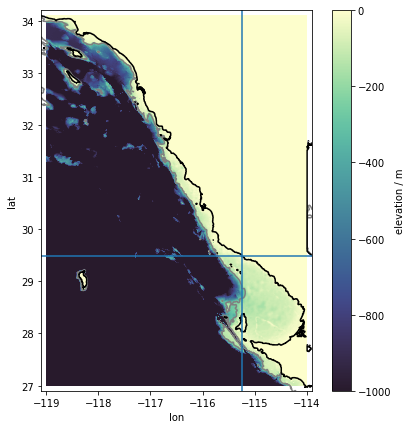

In [41]:
fig, ax = plt.subplots(1,1,figsize=(7,7))
pc = ax.pcolormesh(lon[lon1:lon2],lat[lat1:lat2], elev[lat1:lat2,lon1:lon2], cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
cn = ax.contour(lon, lat, -elev, colors='0.5', levels=[250])
cn = ax.contour(lon, lat, -elev, colors='k', levels=[0])
ax.axhline(lat[lat2-1110])
ax.axvline(lon[lon2-300])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')
ax.set_xlim(-119.1,-113.9)
ax.set_ylim(26.9,34.2)
ax.set_aspect(1)

**Map above**: Colormesh of proposed domain 1 with land set to 0 m and bottom depth flattened at -1000 m.  Black contour at 0 m depth, gray contour at -250 m depth (shelf break). There are some weird features I need to erase. For example, the track lines (I think they come from the measurement tracks) in the "trench" between the main continental shelf, and multiple coastline features on the southeast coast of the bay that I won't be able to resolve.    

In [98]:
nx = 320
ny = 454

lon_vect = np.round(np.linspace(-119.0,-114.0,nx+1), decimals=5)
lat_vect = np.round(np.linspace(27.0,34.1,ny+1), decimals=5)

f_interp = sci_interp.interp2d(lon,lat,elev)

In [99]:
bathy = f_interp(lon_vect,lat_vect)

/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


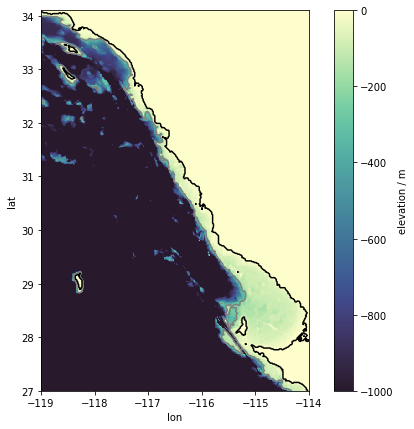

In [100]:
fig, ax = plt.subplots(1,1,figsize=(9,7))
pc = ax.pcolormesh(lon_vect, lat_vect, bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc)
ax.contour(lon_vect,lat_vect, -bathy, colors='0.5', levels=[250])
ax.contour(lon_vect,lat_vect,  -bathy, colors='k', levels=[0])

cb.set_label('elevation / m')
ax.set_xlabel('lon')
ax.set_ylabel('lat')

ax.set_aspect(1)

In [101]:
def smooth(array):
    filtered = (array[:-1,1:]+array[1:,1:]+array[1:,:-1]+array[1:,1:])/4
    return(filtered)

In [102]:
smooth_bathy = (smooth(bathy))

# Add walls 
smooth_bathy[:,-1] = 0 # east
#smooth_bathy[0,:] = 0 # south
smooth_bathy[-1,:] = 0 # north
#smooth_bathy[:,0] = 0 # west


/Users/Karina/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: No contour levels were found within the data range.
  """


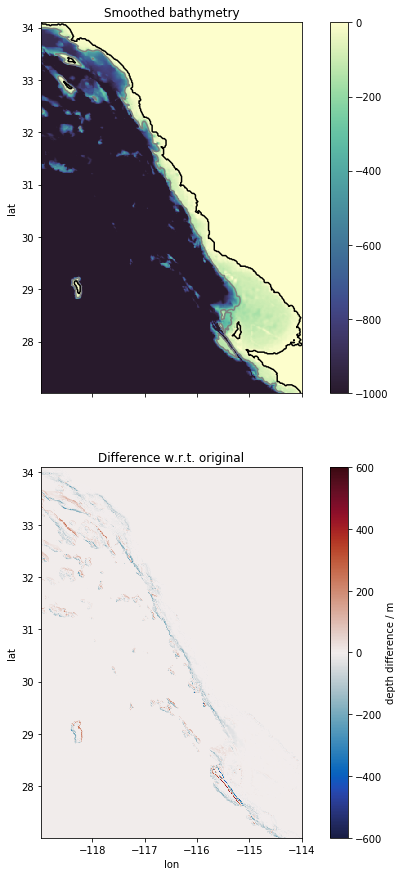

In [103]:
fig, (ax,ax1) = plt.subplots(2,1,figsize=(10,15), sharex=True)
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], smooth_bathy, cmap=cmo.cm.deep_r)
cb = plt.colorbar(pc, ax=ax)
ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])

pc1 = ax1.pcolormesh(lon_vect[1:], lat_vect[1:],
                     smooth_bathy-bathy[1:,1:], 
                     cmap=cmo.cm.balance, vmin=-600, vmax=600)
cb = plt.colorbar(pc1, ax=ax1)

cb.set_label('depth difference / m')
ax1.set_xlabel('lon')
ax.set_ylabel('lat')
ax1.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax1.set_title('Difference w.r.t. original')
ax.set_aspect(1)
ax1.set_aspect(1)

### Final clean up

Remove 1-cell islands and puddles on land

In [104]:
smooth_bathy[358,116]=smooth_bathy[358,117]
# uff, there's lots to fix...

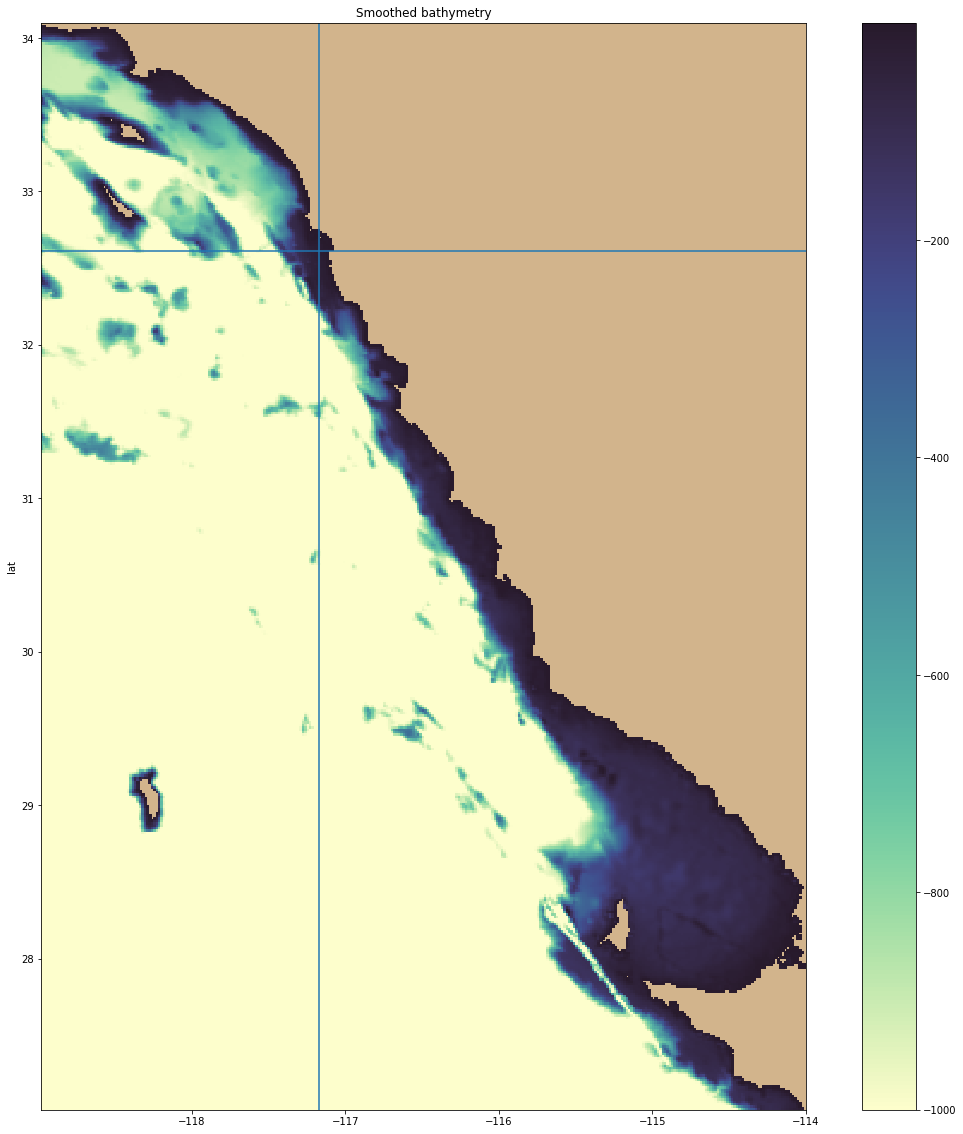

In [105]:
fig, (ax) = plt.subplots(1,1,figsize=(20,20), sharex=True)
mask_smooth = np.ma.masked_values(smooth_bathy,0)
mask = np.ma.getmask(mask_smooth)
ax.set_facecolor('tan')
pc = ax.pcolormesh(lon_vect[1:],lat_vect[1:], np.ma.masked_array(smooth_bathy, mask=mask), cmap=cmo.cm.deep)
cb = plt.colorbar(pc, ax=ax)
ax.axvline(lon_vect[117])
ax.axhline(lat_vect[359])

#ax.contour(lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='0.5', levels=[250])
#ax.contour( lon_vect[1:],lat_vect[1:], -smooth_bathy, colors='k', levels=[0])
ax.set_ylabel('lat')
ax.set_title('Smoothed bathymetry')
ax.set_aspect(1)


### Binary file

In [106]:
# Build grid spacing vectors dx and dy 
delx = lon_vect[1:]-lon_vect[:-1]
dely = lat_vect[1:]-lat_vect[:-1]
dx = np.append(delx, [delx[-1]], axis=0) # This is not the best way to do this
dy = np.append(dely, [dely[-1]], axis=0)

In [107]:
dy

array([0.01564, 0.01564, 0.01564, 0.01564, 0.01563, 0.01564, 0.01564,
       0.01564, 0.01564, 0.01564, 0.01564, 0.01564, 0.01563, 0.01564,
       0.01564, 0.01564, 0.01564, 0.01564, 0.01564, 0.01564, 0.01563,
       0.01564, 0.01564, 0.01564, 0.01564, 0.01564, 0.01564, 0.01564,
       0.01563, 0.01564, 0.01564, 0.01564, 0.01564, 0.01564, 0.01564,
       0.01564, 0.01563, 0.01564, 0.01564, 0.01564, 0.01564, 0.01564,
       0.01564, 0.01564, 0.01563, 0.01564, 0.01564, 0.01564, 0.01564,
       0.01564, 0.01564, 0.01564, 0.01563, 0.01564, 0.01564, 0.01564,
       0.01564, 0.01564, 0.01564, 0.01564, 0.01563, 0.01564, 0.01564,
       0.01564, 0.01564, 0.01564, 0.01564, 0.01564, 0.01563, 0.01564,
       0.01564, 0.01564, 0.01564, 0.01564, 0.01564, 0.01564, 0.01564,
       0.01563, 0.01564, 0.01564, 0.01564, 0.01564, 0.01564, 0.01564,
       0.01564, 0.01563, 0.01564, 0.01564, 0.01564, 0.01564, 0.01564,
       0.01564, 0.01564, 0.01563, 0.01564, 0.01564, 0.01564, 0.01564,
       0.01564, 0.01

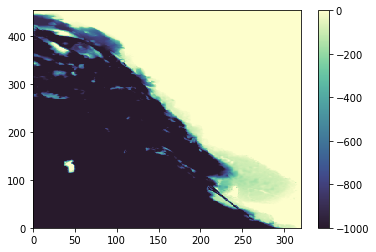

In [109]:
bathy_fname = '320x454/coarse_domain3_SVB_bat.bin'
dx_fname = '320x454/coarse_domain3_SVB_dx.bin'
dy_fname = '320x454/coarse_domain3_SVB_dy.bin'

dt = np.dtype('>f8')  # float 64 big endian

fileobj = open(dx_fname,mode='wb')
dx.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(dy_fname, mode='wb')
dy.astype(dt).tofile(fileobj,"")
fileobj.close()

fileobj = open(bathy_fname, mode='wb')
dd=smooth_bathy
dd.astype(dt).tofile(fileobj,"")
fileobj.close()

plt.pcolor(dd, cmap=cmo.cm.deep_r)
plt.colorbar()
plt.show()

#### Check that bin file works when read by fortran

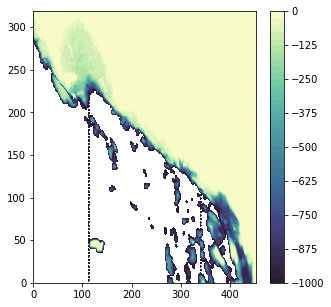

In [110]:
cc=np.fromfile(bathy_fname, dtype=dt)
np.shape(cc)

bF=np.reshape(cc,[nx,ny],'F') # F to read in Fortran order

fig,ax = plt.subplots(1,1, figsize=(5,5))

pc = ax.contourf(bF, 40, cmap=cmo.cm.deep_r)
plt.colorbar(pc,ax=ax)


In [111]:
bF[:,-1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [112]:
ny

454

In [113]:
nx

320